# Introduction to Padding, Strides and Pooling


Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for analyzing visual data.

During convolution, the size of the output feature map is determined by the size of the input feature map, the size of the kernel, and the stride. 

If we simply apply the kernel/ filter window on the input feature map, then the output feature map will be smaller than the input, causing loss of borders pixels or information of the input feature map. 

In order to preserve the border information we use padding with different techniques such as strides.

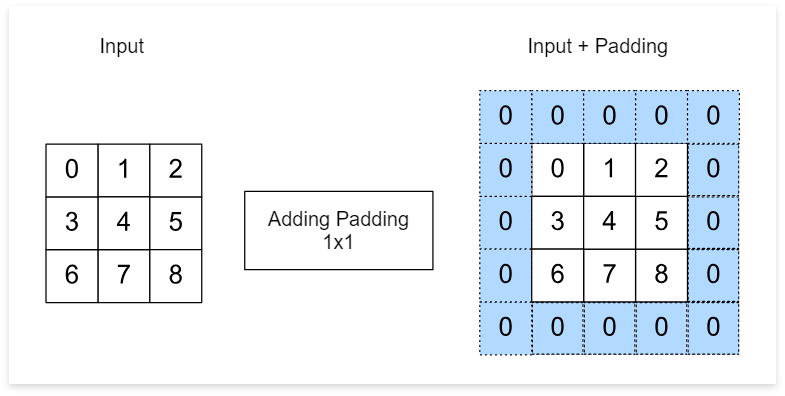

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/minst-fashion-dataset/fashion-mnist_test.csv
/kaggle/input/minst-fashion-dataset/fashion-mnist_train.csv
/kaggle/input/minst-fashion-dataset/submission.csv


In [3]:
data = pd.read_csv("/kaggle/input/minst-fashion-dataset/fashion-mnist_train.csv")
data.shape

(60000, 785)

In [5]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
inputs = data.iloc[:, 1:]
target = data.iloc[:, 0]

In [7]:
inputs

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
target

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [9]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [11]:
print("train_inputs: ", train_inputs.shape)
print("test_inputs: ", test_inputs.shape)
print("train_output: ", train_target.shape)
print("test_output:", test_target.shape)

train_inputs:  (48000, 784)
test_inputs:  (12000, 784)
train_output:  (48000,)
test_output: (12000,)


In [12]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten
from keras import Sequential
from keras.datasets import mnist

2024-04-22 06:15:57.758797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 06:15:57.759098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 06:15:57.933336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Types of Padding

* **Valid Padding (No Padding)**: No extra pixels are added, and the convolution is applied only to valid parts of the image where the filter fits entirely within the image boundaries. This results in an output feature map that is smaller than the input.
* **Same Padding**: Extra pixels (usually zeros) are added around the border to ensure that the output feature map has the same spatial dimensions as the input. This is achieved by calculating the necessary padding size to maintain the input size after convolution.

# Valid Padding

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

# Same Padding

In [17]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

**Advantages of Padding:**
* **Preserves Spatial Dimensions:** Padding, especially "same" padding, maintains the spatial dimensions of the input image in the output feature map, making it easier to stack multiple convolutional layers without reducing the size of the feature maps drastically.
* **Improves Feature Detection at Borders:** By adding padding, the convolutional filters can capture features near the edges of the input image, which might be missed otherwise. This ensures that features located at the borders are given equal importance as those in the center.
* **Prevents Rapid Shrinking of Dimensions:** Padding helps in preventing the rapid reduction in the size of feature maps as the network goes deeper. This is important for preserving enough spatial information through multiple layers of the network.
* **Facilitates Deeper Networks**: By controlling the spatial dimensions, padding allows for the construction of deeper networks with more layers without encountering extremely small feature maps early in the network.

**Disadvantages of Padding:**
* **Computational Overhead:** Adding padding increases the computational complexity and the number of operations required, as the convolutional layer now has to process additional pixels.
* **Potential Information Redundancy:** Padding can introduce redundant or artificial information, especially if the padding is not properly handled (e.g., too many zeros), which might affect the learning process and the quality of the extracted features.
* **Increased Memory Usage:** More memory is required to store the padded input images, which can be a concern in memory-constrained environments or when dealing with very large datasets.
* **Edge Artifacts:** Padding, particularly with zeros, can introduce edge artifacts in the feature maps. This can sometimes lead to less accurate feature representation near the borders of the input image.

# Same Padding with Strides

Strides determine how much the filter moves at each step when sliding across the image. The stride length can be set for both the height and width of the image.

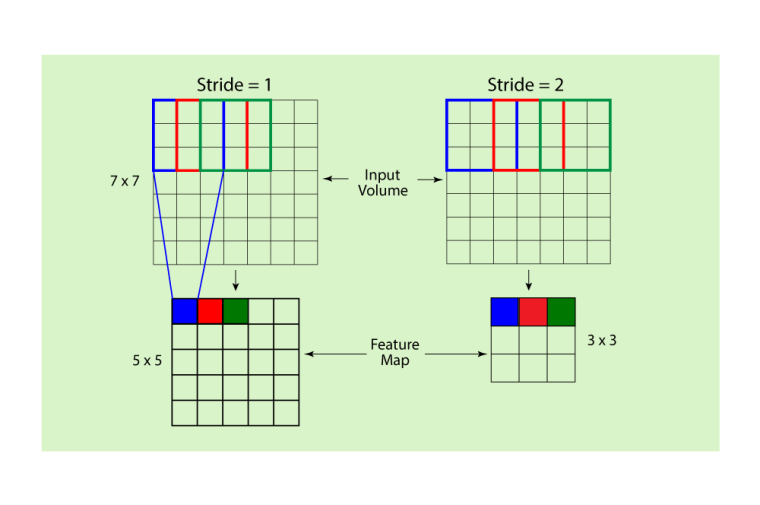

* **Stride of 1**: The filter moves one pixel at a time, resulting in a densely sampled output feature map.
* **Stride of 2**: The filter moves two pixels at a time, resulting in a more sparsely sampled feature map and reducing the spatial dimensions of the output.


In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

# Pooling

A common CNN model architecture is to have a number of convolution and pooling layers stacked one after the other. 

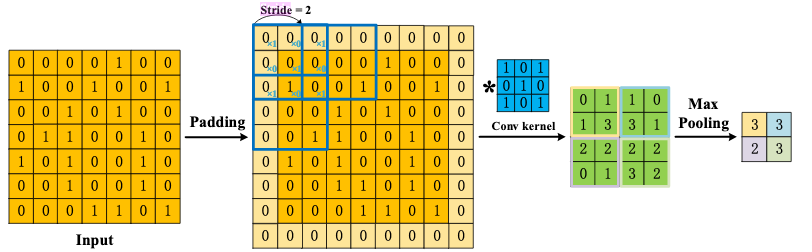

### Why to use Pooling Layers?

* It used to reduce the dimensions of the feature maps. Thus, it reduces computation complexity of the model i.e. the number of trainable parameters and the amount of computation performed in the network.
* The pooling layer summarizes features in a region of the convolution layer's output, allowing further operations on these summarized features. This enhances the model's robustness to variations in feature positions within the input image.

### Frequently used Pooling Layers Types:
 
1. **Max Pooling**: Selects the maximum value from each window of the input feature map. This helps in retaining the most significant features.
2. **Average Pooling**: Computes the average value of each window of the input feature map. This helps in preserving the background information.
3. **Global Pooling**: Reduces the entire feature map to a single value per feature by taking either the maximum or average of all values in the feature map.

* Further, it can be either global max pooling or global average pooling.

In [22]:
from keras.layers import MaxPooling2D

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

Pooling layers are used in conjunction with convolutional layers in a CNN Model, to reduce the spatial dimensions of the feature maps, while the convolutional layers extract progressively complex features from the input. 

The resulting feature maps are then fed into a fully connected layer, which performs the final classification or regression task.

**Advantages of Pooling Layer**:
* **Dimensionality Reduction:** Pooling layers significantly reduce the spatial dimensions of the feature maps, lowering computational costs and helping to prevent overfitting by reducing the number of parameters in the model.
* **Translation Invariance:** It contribute to translation invariance, ensuring that the position of an object in the image does not impact the classification result, as the same features are recognized irrespective of their location.
* **Feature Selection:** Pooling layers aid in selecting the most critical features from the input. Max pooling emphasizes the most prominent features, while average pooling retains more comprehensive information.

**Disadvantages of Pooling Layer**:
* **Information Loss:** A key drawback of pooling layers is the potential loss of important information from the input feature maps, which can be crucial for the final classification or regression task.
* **Over-Smoothing:** Pooling can lead to over-smoothing of the feature maps, resulting in the loss of fine-grained details essential for accurate classification or regression.
* **Hyperparameter Tuning:** Pooling layers introduce hyperparameters, such as the size of the pooling regions and the stride, which must be tuned for optimal performance, increasing the model complexity. 

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.